In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
cd drive/My Drive/aksara

/content/drive/My Drive/aksara


In [ ]:
#mengambil path dari tiap dataset
def ImagesAndLabels(directories, data_type):
  image_files = []
  labels = []
  for i in range(0, len(directories)):
    if (directories[i] == data_type):
      os.chdir(directories[i])
      files = os.listdir()
      for j in range(0, len(files)):
        os.chdir(files[j])
        images=os.listdir()
        for k in range(0, len(images)):
          images[k] = directories[i] + "/" + files[j] + "/" + images[k]
          labels.append(files[j])
        os.chdir("..")
        image_files = image_files + images
      os.chdir("..")
  return image_files, labels

#preprocess gambar dataset
def load_image_files(data):
  images = []
  Y = []
  for obj in data.values:
    print (obj)
    img = cv2.imread(obj[0])
    mean = img.mean()
    tresh = img > mean
    img = img * tresh
    images.append(img)
    Y.append(obj[1])
  X = np.array(images)
  Y = np.array(Y)
  print("Y Shape: ", Y.shape)
  print("X Shape: ", X.shape)
  return X, Y

def hot_matrix(true_label):
  label = true_label
  for i in range(len(label)):
    if label[i] == 'ga':
      label[i] = 0
    elif label[i] == 'dha':
      label[i] = 1
    elif label[i] == 'ma':
      label[i] = 2
    elif label[i] == 'ha':
      label[i] = 3
    elif label[i] == 'da':
      label[i] = 4    
    elif label[i] == 'ba':
      label[i] = 5
    elif label[i] == 'ka':
      label[i] = 6
    elif label[i] == 'la':
      label[i] = 7
    elif label[i] == 'ja':
      label[i] = 8
    elif label[i] == 'ca':
      label[i] = 9
    elif label[i] == 'nya':
      label[i] = 10
    elif label[i] == 'nga':
      label[i] = 11
    elif label[i] == 'pa':
      label[i] = 12
    elif label[i] == 'ya':
      label[i] = 13
    elif label[i] == 'sa':
      label[i] = 14
    elif label[i] == 'ta':
      label[i] = 15
    elif label[i] == 'wa':
      label[i] = 16
    elif label[i] == 'tha':
      label[i] = 17
    elif label[i] == 'ra':
      label[i] = 18
    elif label[i] == 'na':
      label[i] = 19
  return label

In [ ]:
PATH = 'hanacaraka'
directories = os.listdir()
print (directories)
X_train, y_train = ImagesAndLabels(directories, "train")
X_test, y_test = ImagesAndLabels(directories, "test")

['coba', 'test', 'train']


In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

['train/dha/dha110.pred3.png', 'train/dha/dha110.pred3.b.png', 'train/dha/dha11.mine3.rm5.png', 'train/dha/dha11.mine3.rm10.png', 'train/dha/dha11.mine3.r10.png', 'train/dha/dha11.mine3.r5.png', 'train/dha/dha11.mine3.png', 'train/dha/dha11.mine3.b.png', 'train/dha/dha11.meki.rm5.png', 'train/dha/dha11.meki.rm10.png', 'train/dha/dha11.meki.r5.png', 'train/dha/dha11.meki.png', 'train/dha/dha11.meki.b.png', 'train/dha/dha11.meki.r10.png', 'train/dha/dha32.mine.b.png', 'train/dha/dha31.mine3.rm5.png', 'train/dha/dha31.mine3.rm10.png', 'train/dha/dha31.mine3.r5.png', 'train/dha/dha31.mine3.png', 'train/dha/dha31.mine3.r10.png', 'train/dha/dha31.mine3.b.png', 'train/dha/dha152.mine.rm10.png', 'train/dha/dha152.mine.rm5.png', 'train/dha/dha152.mine.r5.png', 'train/dha/dha152.mine.r10.png', 'train/dha/dha14.nando.rm10.png', 'train/dha/dha152.mine.b.png', 'train/dha/dha14.nando.r5.png', 'train/dha/dha14.nando.r10.png', 'train/dha/dha14.nando.rm5.png', 'train/dha/dha152.mine.png', 'train/dha/dh

In [ ]:
data_train = {"filename": X_train, 
        "label": y_train
        }
df = pd.DataFrame(data=data_train)
df_shuffled = df.sample(frac = 1)
dataset_train = df_shuffled
print(dataset_train)

                           filename label
994   train/ra/ra122.pred3.rm10.png    ra
835          train/ta/ta67.mine.png    ta
414      train/ba/ba78.mine.rm5.png    ba
78    train/dha/dha51.mine3.rm5.png   dha
862       train/ta/ta9.nando.r5.png    ta
...                             ...   ...
1975                train/ha/19.png    ha
1694    train/la/la41.mine2.rm5.png    la
1879      train/ja/ja52.mine3.b.png    ja
1580    train/ma/ma67.mine2.rm5.png    ma
571    train/wa/wa108.mine.rm10.png    wa

[2174 rows x 2 columns]


In [ ]:
data_test = {"filename": X_test, 
        "label": y_test
        }
df = pd.DataFrame(data=data_test)
df_shuffled = df.sample(frac = 1)
dataset_test = df_shuffled
print(dataset_test)

                          filename label
468    test/nya/nya15.mine.rm5.png   nya
218      test/ha/ha201.pred.r5.png    ha
183  test/nga/nga220.pred.rm10.png   nga
444       test/pa/pa211.pred.b.png    pa
460  test/nya/nya175.pred.rm10.png   nya
..                             ...   ...
151      test/da/da5.theo.rm10.png    da
166      test/da/da166.pred.r5.png    da
221       test/ha/ha201.pred.b.png    ha
43     test/ga/ga217.pred.rm10.png    ga
123      test/ja/ja12.theo.r10.png    ja

[480 rows x 2 columns]


In [ ]:
X_train, y_train = load_image_files(dataset_train)
X_test, y_test = load_image_files(dataset_test)

['train/ra/ra122.pred3.rm10.png' 'ra']
['train/ta/ta67.mine.png' 'ta']
['train/ba/ba78.mine.rm5.png' 'ba']
['train/dha/dha51.mine3.rm5.png' 'dha']
['train/ta/ta9.nando.r5.png' 'ta']
['train/wa/wa8.meki.rm10.png' 'wa']
['train/ta/ta67.mine.b.png' 'ta']
['train/nya/nya74.mine3.r5.png' 'nya']
['train/ka/ka45.mine.rm5.png' 'ka']
['train/ja/ja91.mine3.r10.png' 'ja']
['train/pa/pa91.mine.png' 'pa']
['train/na/na42.mine.rm10.png' 'na']
['train/ba/ba136.pred3.b.png' 'ba']
['train/ga/ga76.mine3.r10.png' 'ga']
['train/ha/ha79.mine3.r10.png' 'ha']
['train/da/da105.mine.rm5.png' 'da']
['train/pa/pa10.meki.r10.png' 'pa']
['train/ha/ha0.meki.r5.png' 'ha']
['train/da/da45.mine3.png' 'da']
['train/ba/ba58.mine.rm5.png' 'ba']
['train/nya/nya46.mine2.png' 'nya']
['train/pa/pa62.mine2.r5.png' 'pa']
['train/nga/nga71.mine2.r5.png' 'nga']
['train/ka/ka56.mine2.r5.png' 'ka']
['train/ma/ma115.mine.rm10.png' 'ma']
['train/nya/nya66.mine2.png' 'nya']
['train/ya/ya73.mine3.r5.png' 'ya']
['train/ka/ka7.nando.r10

In [ ]:
X_train.shape

(2174, 224, 224, 3)

In [ ]:
X_test.shape

(480, 224, 224, 3)

In [ ]:
# #knn
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score

# for i in range(1,10):
#   knn=KNeighborsClassifier(n_neighbors=i, metric='euclidean')
#   knn.fit(X_train, y_train)
#   y_pred=knn.predict(X_test)
#   print('K=',i,' Accuracy Score: ', (accuracy_score(y_test, y_pred))*100, " %")


In [ ]:
from keras.models import Sequential, Model
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

In [ ]:
#alexnet
model = Sequential()
model.add(layers.Resizing(224, 224, interpolation='bilinear', input_shape=(224,224,3)))
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation = 'relu', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='valid'))

model.add(layers.Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(20, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       8

In [ ]:
y_trainH = hot_matrix(y_train)
y_testH = hot_matrix(y_test)

print(y_trainH)
print(y_testH)
y_trainH = np_utils.to_categorical(y_trainH)
y_testH = np_utils.to_categorical(y_testH)
print(y_trainH)
print(y_testH)

['18' '15' '5' ... '8' '2' '16']
['10' '3' '11' '12' '10' '3' '5' '3' '1' '1' '12' '13' '12' '19' '5' '9'
 '15' '3' '10' '5' '12' '18' '18' '13' '10' '2' '3' '2' '14' '8' '17' '12'
 '13' '11' '4' '14' '18' '13' '12' '3' '1' '0' '7' '11' '16' '11' '15' '2'
 '14' '15' '12' '10' '14' '17' '16' '2' '4' '10' '12' '11' '6' '15' '14'
 '18' '18' '3' '19' '1' '5' '6' '3' '2' '16' '17' '9' '13' '15' '12' '10'
 '15' '7' '17' '6' '1' '5' '16' '7' '4' '0' '11' '6' '12' '1' '1' '9' '0'
 '11' '13' '19' '7' '10' '17' '1' '19' '1' '6' '4' '3' '6' '1' '6' '7'
 '16' '15' '7' '9' '0' '6' '5' '14' '4' '5' '8' '16' '12' '10' '9' '6'
 '14' '13' '13' '8' '1' '18' '13' '7' '3' '14' '18' '1' '8' '14' '5' '17'
 '6' '15' '18' '2' '2' '1' '15' '15' '8' '5' '16' '6' '0' '13' '7' '19'
 '2' '4' '1' '11' '18' '0' '17' '16' '18' '2' '18' '9' '7' '16' '4' '9'
 '7' '9' '2' '11' '5' '13' '6' '5' '18' '16' '17' '0' '3' '16' '16' '14'
 '1' '0' '6' '10' '4' '19' '16' '10' '8' '9' '15' '14' '19' '10' '7' '13'
 '13' '8' '18' '

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(X_train, y_trainH, epochs=20, batch_size = 128, validation_data=(X_test, y_testH))

Epoch 1/20
17/17 [==============================] - 19s 316ms/step - loss: 23.7556 - accuracy: 0.0552 - val_loss: 2.9923 - val_accuracy: 0.0771
Epoch 2/20
17/17 [==============================] - 2s 131ms/step - loss: 2.9445 - accuracy: 0.0860 - val_loss: 2.7493 - val_accuracy: 0.1729
Epoch 3/20
17/17 [==============================] - 2s 120ms/step - loss: 2.5780 - accuracy: 0.2065 - val_loss: 2.3068 - val_accuracy: 0.2750
Epoch 4/20
17/17 [==============================] - 2s 121ms/step - loss: 1.8924 - accuracy: 0.3896 - val_loss: 1.5385 - val_accuracy: 0.5146
Epoch 5/20
17/17 [==============================] - 2s 121ms/step - loss: 1.0316 - accuracy: 0.6578 - val_loss: 0.9923 - val_accuracy: 0.7333
Epoch 6/20
17/17 [==============================] - 2s 121ms/step - loss: 0.5682 - accuracy: 0.8188 - val_loss: 0.7807 - val_accuracy: 0.7583
Epoch 7/20
17/17 [==============================] - 2s 121ms/step - loss: 0.3308 - accuracy: 0.8947 - val_loss: 1.2852 - val_accuracy: 0.7500
Epoc

In [ ]:
def Prediction(gambar):
  plt.figure(figsize = (15, 6))
  index = -1
  for i in range (0, len(gambar)):
    img = cv2.imread(gambar[i])
    plt.subplot(1, len(gambar), i + 1)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = np.expand_dims(img, axis = 0)
    print (img.shape)

    pred = model.predict(img)
    p = np.round(pred)

    for j in range(0, 20):
      if (p[0][j].any() == 1):
        index = j
    
    if (index == 0):
      print("ga")
    elif (index == 1):
      print("dha")
    elif (index == 2):
      print("ma")
    elif (index == 3):
      print("ha")
    elif (index == 4):
      print("da")
    elif (index == 5):
      print("ba")
    elif (index == 6):
      print("ka")
    elif (index == 7):
      print("la")
    elif (index == 8):
      print("ja")
    elif (index == 9):
      print("ta")
    elif (index == 10):
      print("nya")
    elif (index == 11):
      print("nga")
    elif (index == 12):
      print("pa")
    elif (index == 13):
      print("ya")
    elif (index == 14):
      print("sa")
    elif (index == 15):
      print("ta")
    elif (index == 16):
      print("wa")
    elif (index == 17):
      print("tha")
    elif (index == 18):
      print("ra")
    elif (index == 19):
      print("na")
  
  plt.show()

(1, 224, 224, 3)
pa
(1, 224, 224, 3)
ba
(1, 224, 224, 3)
ba
(1, 224, 224, 3)
ba
(1, 224, 224, 3)
ya
(1, 224, 224, 3)
la
(1, 224, 224, 3)
ma
(1, 224, 224, 3)
ma
(1, 224, 224, 3)
ma
(1, 224, 224, 3)
ha


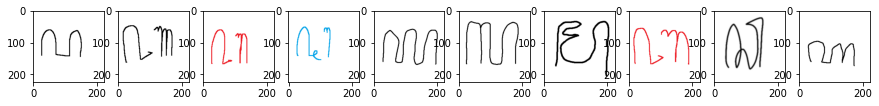

In [ ]:
# path = [
#         "coba/pa1.png",
#         #'coba/Copy of pa1.png'
#         "coba/Copy_of_pa.png"
# ]

path = [
        "coba/pa1.png",
        "coba/nya.png",
        "coba/ba1.png",
        "coba/tha.png",
        "coba/template_(1).png",
        "coba/template_(2).png",
        "coba/template.png",
        "coba/ba.png",
        "coba/ca.png",
        "coba/h19.png"
]

Prediction(path)

(1, 224, 224, 3)


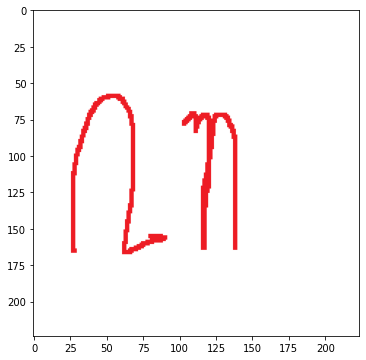

In [ ]:
path = [
        "coba/ba1.png"
]

Prediction(path)

In [ ]:
# img = cv2.imread('coba/pa1.png')
# img = cv2.resize(img, (224, 224))
# plt.imshow(img)
# print (img.shape)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = np.expand_dims(img, axis = 0)


# pred = model.predict(img)
# print(pred)
# p = np.round(pred)
# print(p)


In [ ]:
# #CNN
# modelc = models.Sequential()
# modelc.add(layers.Resizing(224, 224, interpolation='bilinear', input_shape = (224, 224, 3)))
# modelc.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), strides=(1, 1), activation = "relu", input_shape=(32,32,3), padding='same'))
# modelc.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 1)))
# modelc.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation = 'relu'))
# modelc.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
# modelc.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'))
# modelc.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
# modelc.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(4, 4), padding='same', activation='relu'))
# modelc.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
# modelc.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(4, 4), padding='same', activation='relu'))
# modelc.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1,1)))

# modelc.add(layers.Flatten())
# modelc.add(layers.Dense(128, activation='relu'))
# modelc.add(layers.Dense(20, activation='softmax'))

In [ ]:
# modelc.summary()

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.001)
# modelc.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
# modelc.fit(X_train, y_trainH, epochs=10, batch_size = 100, validation_data=(X_test, y_testH))

In [ ]:
# def PredicktionC(gambar):
#   plt.figure(figsize = (15, 6))
#   index = -1
#   for i in range (0, len(gambar)):
#     img = cv2.imread(gambar[i])
#     plt.subplot(1, len(gambar), i + 1)
#     img = cv2.resize(img, (224, 224))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     img = np.expand_dims(img, axis = 0)
#     print (img.shape)

#     pred = modelc.predict(img)
#     p = np.round(pred)

#     for j in range(0, 20):
#       if (p[0][j].any() == 1):
#         index = j
    
#     if (index == 0):
#       print("ga")
#     elif (index == 1):
#       print("dha")
#     elif (index == 2):
#       print("ma")
#     elif (index == 3):
#       print("ha")
#     elif (index == 4):
#       print("da")
#     elif (index == 5):
#       print("ba")
#     elif (index == 6):
#       print("ka")
#     elif (index == 7):
#       print("la")
#     elif (index == 8):
#       print("ja")
#     elif (index == 9):
#       print("ta")
#     elif (index == 10):
#       print("nya")
#     elif (index == 11):
#       print("nga")
#     elif (index == 12):
#       print("pa")
#     elif (index == 13):
#       print("ya")
#     elif (index == 14):
#       print("sa")
#     elif (index == 15):
#       print("ta")
#     elif (index == 16):
#       print("wa")
#     elif (index == 17):
#       print("tha")
#     elif (index == 18):
#       print("ra")
#     elif (index == 19):
#       print("na")
  
#   plt.show()

In [ ]:
# pathc = [
#         "coba/pa1.png",
#         "coba/nya.png",
#         "coba/ba1.png",
#         "coba/tha.png",
#         "coba/template_(1).png",
#         "coba/template_(2).png",
#         "coba/template.png",
#         "coba/ba.png",
#         "coba/ca.png"
# ]

# PredicktionC(pathc)